In [99]:
# Importar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Para formatar o eixo monetário

In [100]:
# Puxar os dados do arquivo txt

db = pd.read_csv('transacoes.txt', sep='|', header=None, names=['tipo','descricao','valor','data','categoria'])

# Exibir informações iniciais sobre os dados

print("="*60)
print("Dados financeiros pessoais")
print("="*60)

print(f"\n {len(db)} transações registradas.\n")

print("Primeiras linhas:")
display(db.head())

print("Informações gerais do banco de dados:")
display(db.info())



print("")

Dados financeiros pessoais

 262 transações registradas.

Primeiras linhas:


,tipo,descricao,valor,data,categoria
0,receita,Salário mensal,14500.0,2025-01-05,NaN
1,receita,Freelance desenvolvimento web,4500.0,2025-01-08,NaN
2,receita,Consultoria TI,3200.0,2025-01-15,NaN
3,receita,Rendimentos investimentos,380.0,2025-01-20,NaN
4,despesa,Aluguel apartamento,2500.0,2025-01-05,Moradia


Informações gerais do banco de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tipo       262 non-null    object 
 1   descricao  262 non-null    object 
 2   valor      262 non-null    float64
 3   data       262 non-null    object 
 4   categoria  210 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


None

# NOTEBOOK EM DESENVOLVIMENTO

### 1. **Análise de Fluxo de Caixa**

- **Saldo mensal**: Receitas vs Despesas por mês
- **Tendência de acumulação**: Seu patrimônio está crescendo ou diminuindo?
- **Meses críticos**: Identificar meses com saldo negativo


Seu saldo é: R$ 61295.10

1. Receita - Despesa em cada mês.


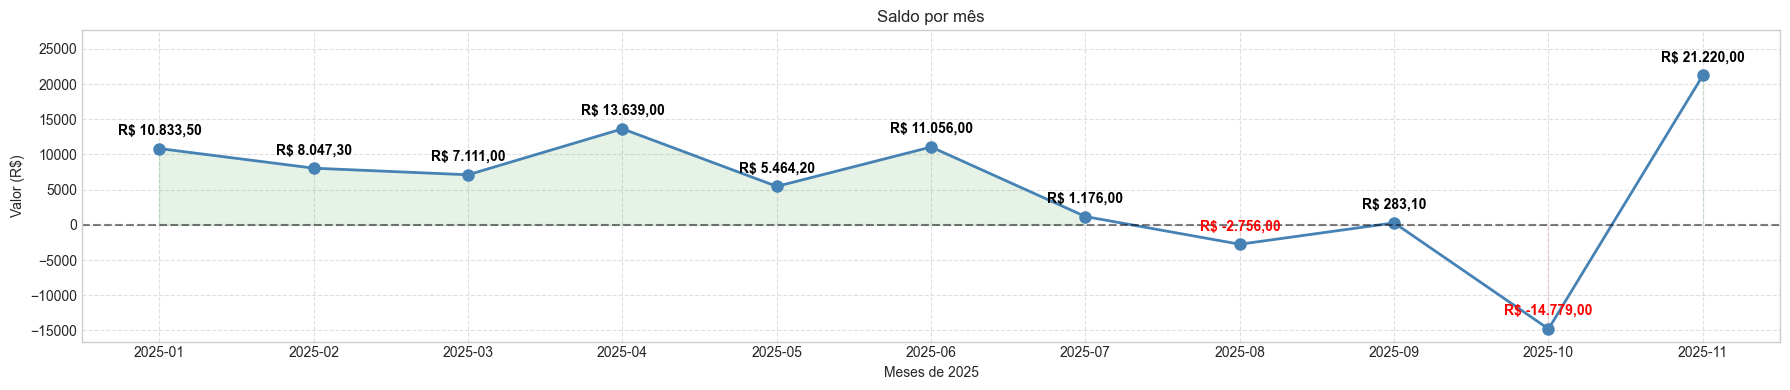


2. A evolução do patrimônio através dos meses.


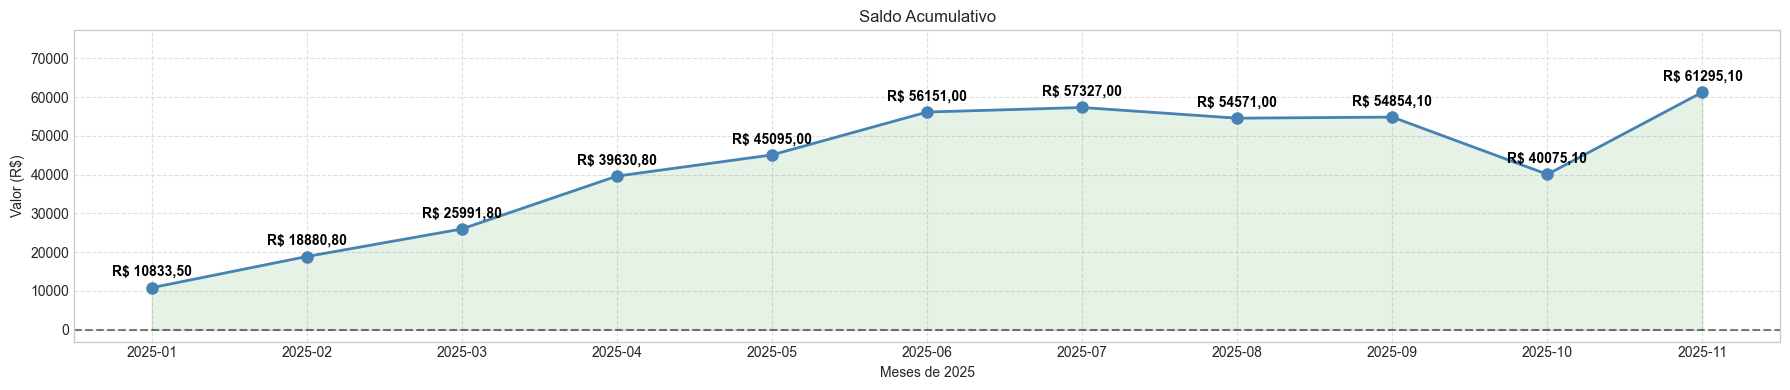

In [129]:
# Transformar a coluna 'data' para uma coluna ano-mês

db['data'] = pd.to_datetime(db['data'])

db['data_mes'] = db['data'].dt.strftime('%Y-%m')

# Agrupando para calculo do saldo e saldo cumulativo

saldo = db.groupby(['data_mes', 'tipo'])['valor'].sum().reset_index()
df = saldo.pivot_table(index='data_mes', columns='tipo', values='valor', aggfunc='sum').reset_index().fillna(0)
df['saldo'] = df['receita'] - df['despesa']
df['saldo_cum'] = df['saldo'].cumsum()

# Imprimindo o saldo atual

print(f"\nSeu saldo é: R$ {df['saldo'].sum():.2f}\n")

# 1. Receita - Despesa em cada mês


print("1. Receita - Despesa em cada mês.")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18,4))

plt.plot(df['data_mes'],df['saldo'], marker='o', markersize=8, color='steelblue', linewidth=2, label='Saldo')
plt.axhline(y=0, color='black',linestyle='--',linewidth=1.5,alpha=0.5)
plt.fill_between(range(len(df)), df['saldo'], 0, 
                 where=(df['saldo'] >= 0), 
                 color='green', alpha=0.1, label='Período Positivo')
plt.fill_between(range(len(df)), df['saldo'], 0, 
                 where=(df['saldo'] < 0), 
                 color='red', alpha=0.1, label='Período Negativo')
for i, valor in enumerate(df["saldo"]):
    valor = round(valor,2)
    plt.text(i, valor + 2000, f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'), ha='center', fontsize=10, weight='bold',color= 'black' if valor > 0 else 'red')

plt.title("Saldo por mês")
plt.xlabel("Meses de 2025")
plt.ylabel("Valor (R$)")
ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax*1.2)
plt.grid(True,linestyle="--",alpha = 0.6)
plt.tight_layout()
plt.show()

# 2. Evoução do patrimônio

print("\n2. A evolução do patrimônio através dos meses.")

plt.figure(figsize=(18,4))

plt.plot(df['data_mes'],df['saldo_cum'],marker='o', markersize=8, color='steelblue', linewidth=2, label='Saldo Cumulativo')
plt.axhline(y=0, color='black',linestyle='--',linewidth=1.5,alpha=0.5)
plt.fill_between(range(len(df)), df['saldo_cum'], 0, 
                 where=(df['saldo_cum'] >= 0), 
                 color='green', alpha=0.1, label='Período Positivo')
plt.fill_between(range(len(df)), df['saldo_cum'], 0, 
                 where=(df['saldo_cum'] < 0), 
                 color='red', alpha=0.1, label='Período Negativo')

for i, valor in enumerate(df['saldo_cum']):
    plt.text(i, valor + 3000, f"R$ {valor:.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'), ha='center',fontsize=10,weight='bold',color= 'black' if valor > 0 else 'red')
plt.title("Saldo Acumulativo")
plt.xlabel("Meses de 2025")
plt.ylabel("Valor (R$)")
ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax*1.2)
plt.grid(True,linestyle="--",alpha = 0.6)
plt.tight_layout()
plt.show()

# 3 Análise com os meses mais críticos 



### 2. **Distribuição de Despesas por Categoria**

- **Top 10 categorias**: Onde você mais gasta (provavelmente Moradia, Alimentação, Transporte)
- **Proporção do orçamento**: Quanto % cada categoria representa
- **Comparação com benchmarks**: Ex: alimentação deveria ser ~20-30% do orçamento

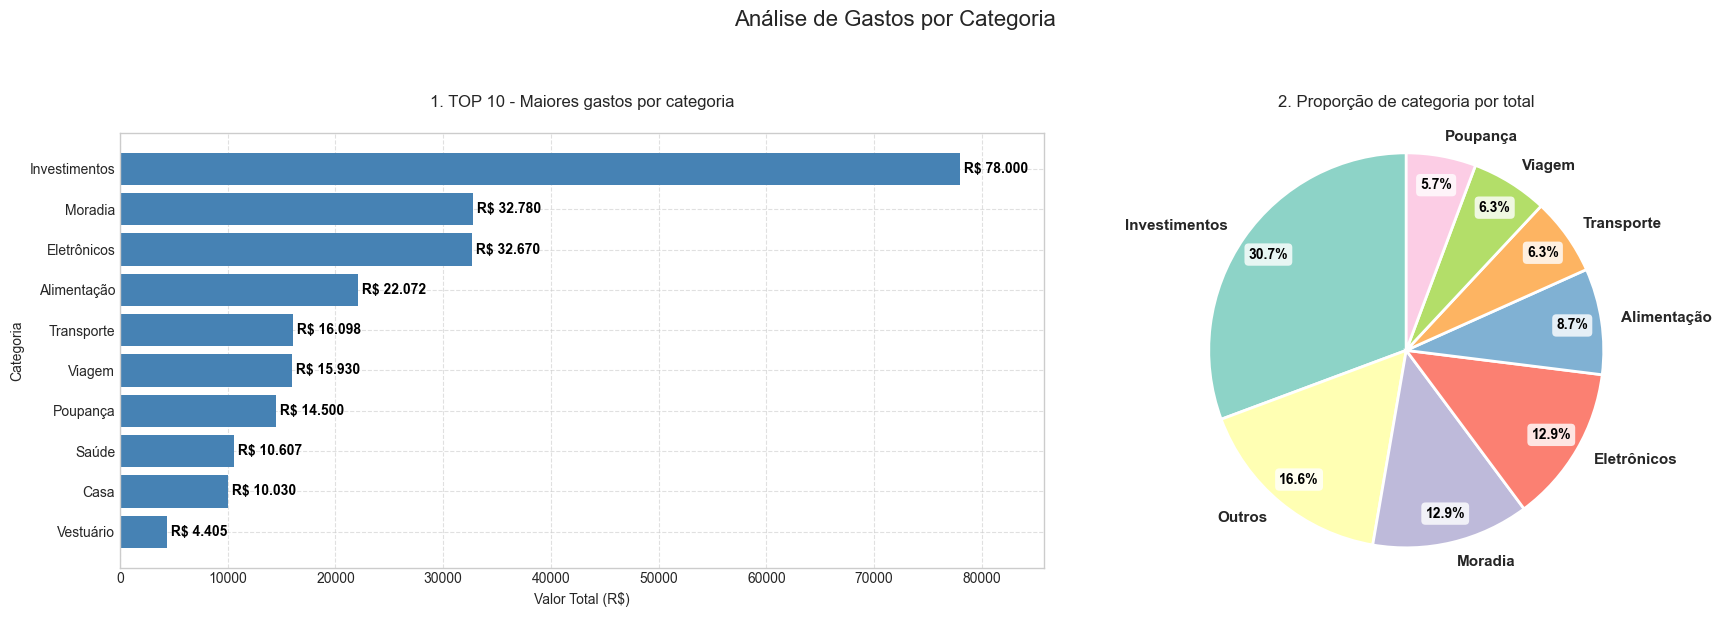

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6), gridspec_kw={'width_ratios':[6,4]})

# Top 10 maiores gastos por categoria

maiores_gastos = db.groupby('categoria')['valor'].sum().sort_values(ascending=False).reset_index()
maiores_gastos10 = maiores_gastos.head(10)

plt.style.use('seaborn-v0_8-whitegrid')


ax[0].set_title('1. TOP 10 - Maiores gastos por categoria\n', fontsize=12)
ax[0].invert_yaxis()
ax[0].set_xlabel('Valor Total (R$)')
ax[0].set_ylabel('Categoria')
ax[0].barh(maiores_gastos10['categoria'],maiores_gastos10['valor'], color='steelblue')
ax[0].grid(True, linestyle='--',alpha=0.6)
ax[0].set_xlim(0,maiores_gastos10['valor'].max() * 1.1)

for i, valor in enumerate(maiores_gastos10['valor']):
    valor_formatado = f' R$ {valor:,.0f}'.replace(',','.')
    ax[0].text(valor,
        i,
        valor_formatado, # Adiciona um pequeno espaço para não tocar na barra
        ha='left',
        va='center',
        fontsize=10,
        color='black',
        weight='bold'
    )
# Proporção de quanto % cada categoria representa
maiores_gastos['v/total'] = round((maiores_gastos['valor']/maiores_gastos['valor'].sum())*100,2)
selecionar_mg = maiores_gastos.iloc[7:]
selecionar_valor = selecionar_mg['valor'].sum()
selecionar_vtotal = selecionar_mg['v/total'].sum()
outros = pd.DataFrame({
    'categoria':['Outros'],
    'valor': selecionar_valor,
    'v/total': selecionar_vtotal
})
maiores_gastos6 = maiores_gastos.iloc[:7]
maiores_gastos_final = pd.concat([maiores_gastos6,outros], ignore_index=True).sort_values('valor',ascending=False)

# Criando gráfico de pizza com melhorias
colors = plt.cm.Set3(range(len(maiores_gastos_final)))  # Paleta de cores mais vibrante

wedges, texts, autotexts = ax[1].pie(
    maiores_gastos_final['v/total'],
    labels=maiores_gastos_final['categoria'], 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True},
    textprops={'fontsize': 11, 'weight': 'bold'},  # Labels das categorias
    pctdistance=0.85  # Distância das porcentagens do centro
)

# Melhorando a visibilidade das porcentagens
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    autotext.set_bbox(dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='none'))

ax[1].set_title('2. Proporção de categoria por total\n', fontsize=12)
ax[1].axis('equal')

fig.suptitle('Análise de Gastos por Categoria\n', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Explorar os investimentos que foi a maior parte da despesa - LOADING

### 3. **Análise de Receitas**

- **Receitas recorrentes vs extras**: Salário vs freelances/vendas
- **Evolução salarial**: Acompanhar aumentos (R$ 5.800 → R$ 6.500)
- **Dependência de renda extra**: Quanto % vem de freelances?

1. Salário x Variável


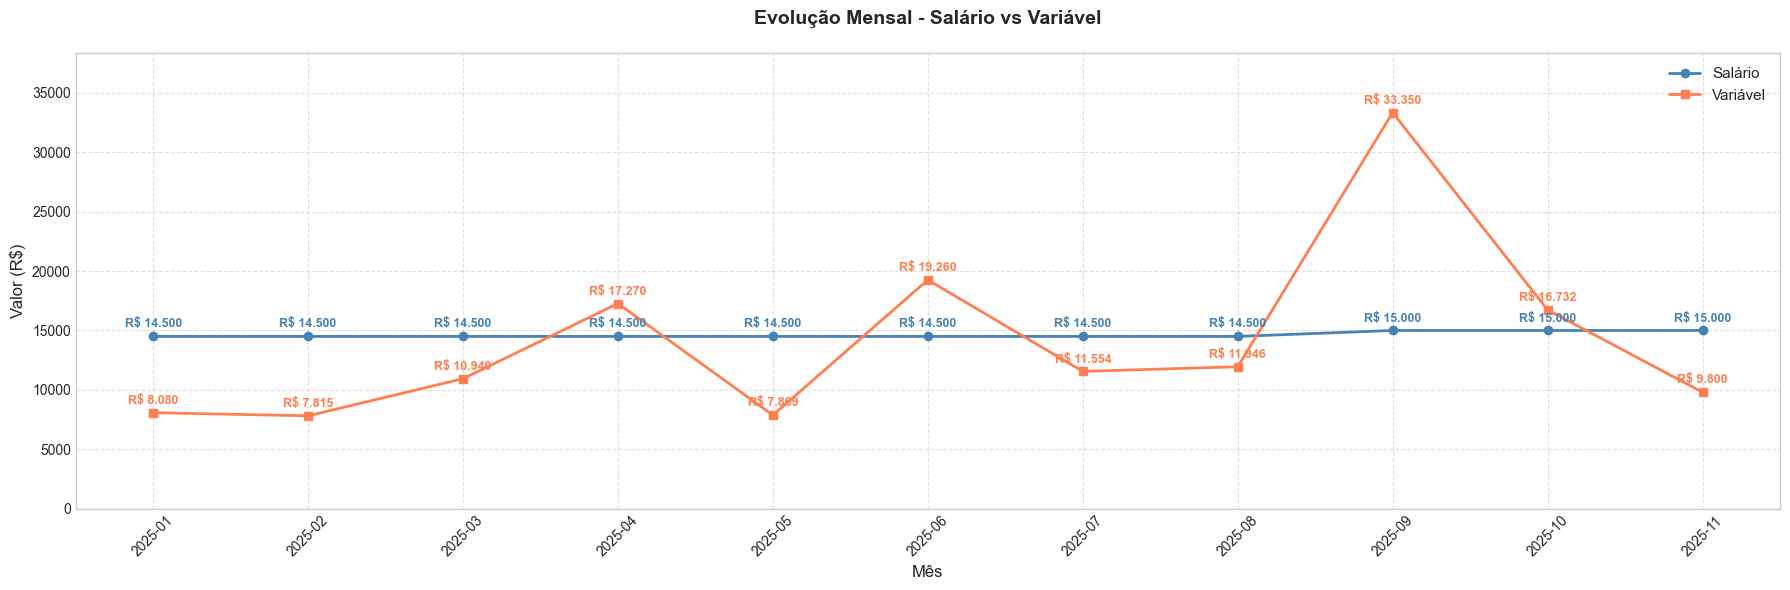

In [161]:
db_receitas = db[db['tipo'] == 'receita']
receitas_mensal = db_receitas.groupby(['data_mes','descricao'])['valor'].sum().reset_index()

# Criando coluna para diferencias fixo de variável

salario = receitas_mensal[receitas_mensal['descricao'] == 'Salário mensal'].copy()
salario['tipo_receita'] = 'fixo'
variavel = receitas_mensal[receitas_mensal['descricao'] != 'Salário mensal'].copy()
variavel['tipo_receita'] = 'variavel'

# Transformando em uma df com dados de variavel x fixo por mês

salario_agrupado = salario.groupby(['data_mes','tipo_receita'])['valor'].sum().reset_index()
variavel_agrupado = variavel.groupby(['data_mes','tipo_receita'])['valor'].sum().reset_index()


# 1. Salário vs Variável
print('1. Salário x Variável')

# tamanho do gráfico
plt.figure(figsize=(18, 6))

# Plotando as duas linhas
plt.plot(salario_agrupado['data_mes'], salario_agrupado['valor'], marker='o', linewidth=2, label='Salário', color='steelblue')
plt.plot(variavel_agrupado['data_mes'], variavel_agrupado['valor'], marker='s', linewidth=2, label='Variável', color='coral')

# Calculando o valor máximo para ajustar o eixo Y
valor_max = max(salario_agrupado['valor'].max(), variavel_agrupado['valor'].max())
plt.ylim(0, valor_max * 1.15)  # Aumenta 15% acima do valor máximo


# Adicionando rótulos - Salário (acima)
for i, (mes, valor) in enumerate(zip(salario_agrupado['data_mes'], salario_agrupado['valor'])):
    valor_formatado = f'R$ {valor:,.0f}'.replace(',', '.')
    plt.text(i, valor + 500, valor_formatado, 
             ha='center', va='bottom', fontsize=9, weight='bold', color='steelblue')

# Adicionando rótulos - Variável (abaixo)
for i, (mes, valor) in enumerate(zip(variavel_agrupado['data_mes'], variavel_agrupado['valor'])):
    valor_formatado = f'R$ {valor:,.0f}'.replace(',', '.')
    plt.text(i, valor + 1500, valor_formatado, 
             ha='center', va='top', fontsize=9, weight='bold', color='coral')

# Configurações do gráfico
plt.title('Evolução Mensal - Salário vs Variável\n', fontsize=14, weight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. **Padrões Temporais**

- **Gastos por dia da semana**: Gasta mais nos finais de semana?
- **Sazonalidade**: Meses com picos (férias, 13º, PLR)
- **Evolução mensal**: Despesas crescendo ao longo do tempo?